# Marketing analytics Exploratory data analysis

### Marketing Eda 
**GOAL :-** 
* You are a data analyst You have to find the customer purchasing trend and pattern from the previous customer purchasing dataset and suggest how to improve sales.

**01: Exploratory Data Analysis** 
* Data Cleaning
* Check null value and treat them
* Check Outliers
* Find pattern and plot

**02: Data Visualization**
* Which type of customer preffred company .
* Most performing product 
* Least performing product 
 

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Remove warning
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load Dataset 
df = pd.read_csv('marketing_data.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
df.shape

(2240, 28)

In [5]:
# generate list of column names
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 ' Income ',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

* Clean column names 
* clear whitespaces
  * _change datatype 'Income' to Float_

In [6]:
# Clean column names 
# clear whitespaces
df.columns = df.columns.str.replace(' ','')

In [7]:
# Clean Income column and change data type of column
df['Income'] = df['Income'].str.replace('$','')
df['Income'] = df['Income'].str.replace(',','').astype('float')

In [8]:
# Once Look at data
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


## __Exploratory data analysis__

* If any null value handle them 
* Work with outliers
* duplicate entries

In [9]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

#### Treat null values

<AxesSubplot:xlabel='Income'>

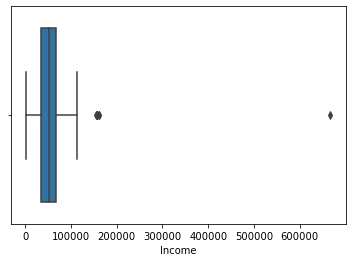

In [10]:
# Check columns with na values
sns.boxplot(x = df['Income'])

In [11]:
# we have found some outliers in 'Income'
# we are fill na value with medium 
df['Income'] = df['Income'].fillna(df['Income'].median())

In [12]:
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

#### Check duplicate rows in dataframe

In [13]:
df.duplicated().sum()

0

### Remove unwanted columns

In [14]:
list(df.columns)

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

### Drop unwanted columns 

In [15]:
df = df.drop(['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2'],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,0,0,1,1,0,2,7,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,0,34,2,3,1,2,7,1,0,SP


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [81]:
# change the date column format to datetime formate
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

In [87]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country,Year_Customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,SP,2014
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,CA,2014
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,US,2014
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,1,1,0,2,7,0,0,AUS,2014
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,34,2,3,1,2,7,1,0,SP,2014


### Outliers

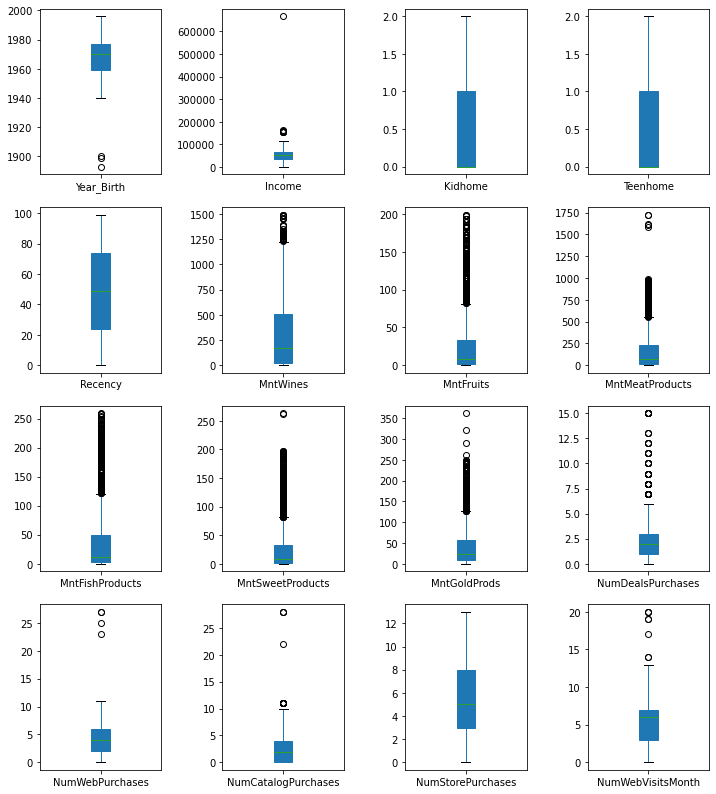

In [19]:
# finding outliers in dataframe

df_outliers = df.drop(['ID','Response','Complain'],axis=1)
# box plot for outliers
df_outliers.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

#### Treat the ouliers 

* no need to do anything with ouliers except 'age' column

In [20]:
(df['Year_Birth']<1930).sum()

3

In [21]:
# keep value customer born after 1930
df= df[df['Year_Birth']>1930].reset_index(drop=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   object        
 3   Marital_Status       2237 non-null   object        
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

###  Data is cleaned 


* Check correlation 
* Now identify pattern and plot

In [23]:
corr = df.corr()
corr

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
ID,1.000000,0.003024,0.013737,0.002202,-0.003543,-0.046755,-0.021181,0.007080,-0.002622,-0.023181,-0.006444,-0.010661,-0.036917,-0.017913,-0.001893,-0.014062,-0.008104,-0.021810,0.031520
Year_Birth,0.003024,1.000000,-0.162346,0.234133,-0.363350,-0.019670,-0.163035,-0.013751,-0.030927,-0.042519,-0.019571,-0.057599,-0.067999,-0.153973,-0.125439,-0.139465,0.117570,0.018424,-0.004479
Income,0.013737,-0.162346,1.000000,-0.424887,0.019117,-0.003205,0.576731,0.428191,0.577524,0.437214,0.435918,0.321082,-0.082089,0.380847,0.586750,0.527346,-0.549429,0.133121,-0.024866
Kidhome,0.002202,0.234133,-0.424887,1.000000,-0.035753,0.007544,-0.496367,-0.372488,-0.437059,-0.387536,-0.370656,-0.349633,0.221799,-0.362063,-0.502438,-0.500387,0.447641,-0.080176,0.036283
Teenhome,-0.003543,-0.363350,0.019117,-0.035753,1.000000,0.017115,0.005409,-0.175951,-0.260820,-0.203900,-0.162218,-0.020186,0.387792,0.155776,-0.110285,0.050517,0.134491,-0.154730,0.007591
Recency,-0.046755,-0.019670,-0.003205,0.007544,0.017115,1.000000,0.016668,-0.003592,0.023705,0.001532,0.023045,0.017412,-0.000987,-0.010616,0.025449,0.001117,-0.021959,-0.198568,0.005398
MntWines,-0.021181,-0.163035,0.576731,-0.496367,0.005409,0.016668,1.000000,0.388518,0.561993,0.399073,0.385992,0.386376,0.010829,0.542177,0.634784,0.642433,-0.320337,0.247392,-0.035930
MntFruits,0.007080,-0.013751,0.428191,-0.372488,-0.175951,-0.003592,0.388518,1.000000,0.542057,0.594438,0.567054,0.390042,-0.131886,0.297024,0.487307,0.463168,-0.417427,0.125904,-0.002800
MntMeatProducts,-0.002622,-0.030927,0.577524,-0.437059,-0.260820,0.023705,0.561993,0.542057,1.000000,0.567880,0.523418,0.348845,-0.122465,0.293579,0.723519,0.480110,-0.539203,0.236640,-0.020720
MntFishProducts,-0.023181,-0.042519,0.437214,-0.387536,-0.203900,0.001532,0.399073,0.594438,0.567880,1.000000,0.579553,0.422103,-0.139440,0.293489,0.534033,0.460099,-0.445760,0.111415,-0.018818


<Figure size 648x432 with 0 Axes>

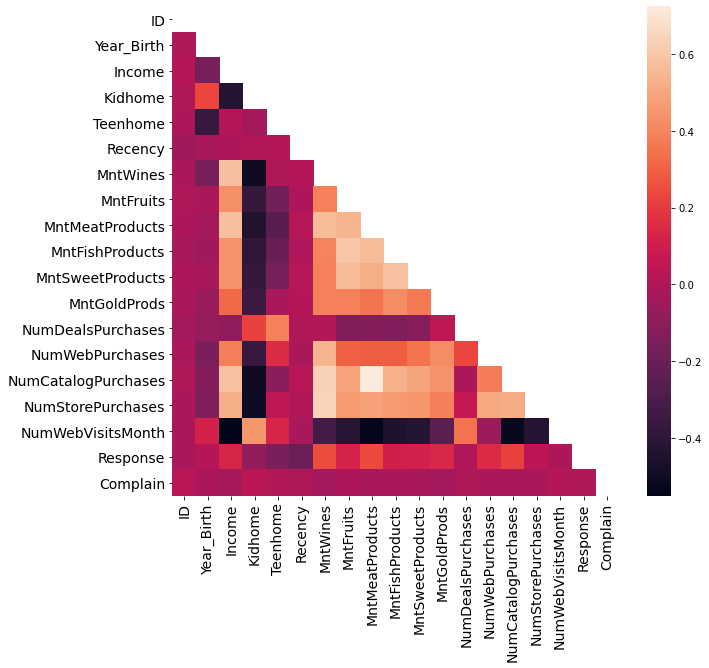

In [24]:
plt.figure(figsize=(9,6))
mask=np.zeros_like(df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True

plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), mask=mask)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Plot all variables and check

### Lets look at the customer born year

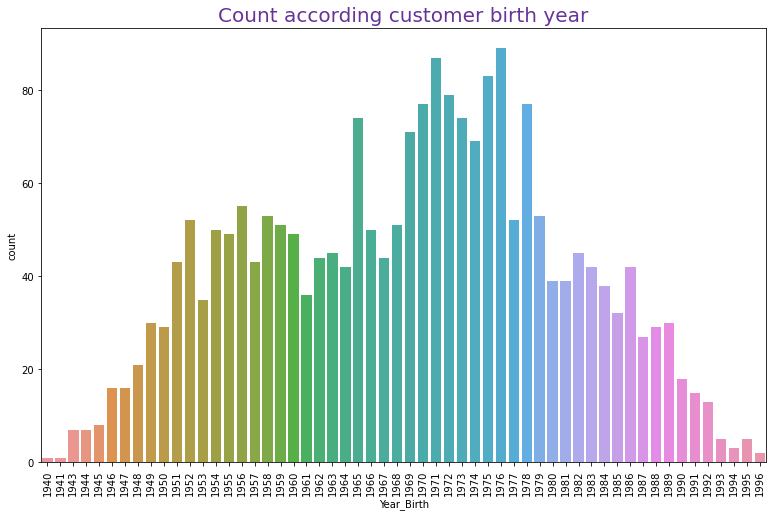

In [123]:
# count plot for know the customer born year  
plt.figure(figsize=(13,8))
ax=sns.countplot(df['Year_Birth'])
plt.xticks(rotation=90)
plt.title("Count according customer birth year",size=20,color='rebeccapurple')
plt.show()

###### According to count plot companies customer base 

* according to plot most customer of company are born between 1950 and 1990

### Lets Look at customer Income

* most cutomers salary range 

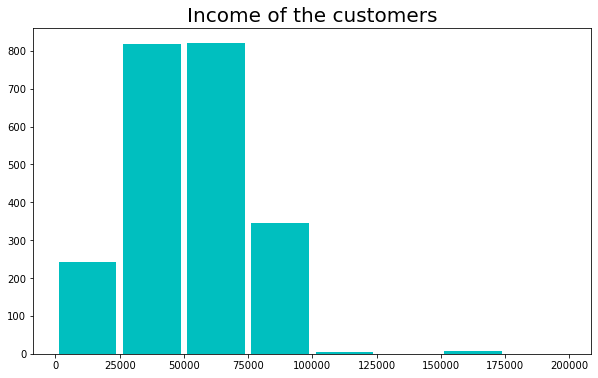

In [26]:
plt.figure(figsize=(10,6))
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000]
plt.hist(df['Income'],bins,histtype='barstacked',color='c',rwidth=0.9,orientation = 'vertical')
plt.title("Income of the customers", size = 20)
# plt.xticks(rotation=90)
plt.show()

In [27]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Country'],
      dtype='object')

### Look at the customer with kids, Teens ,Marital status

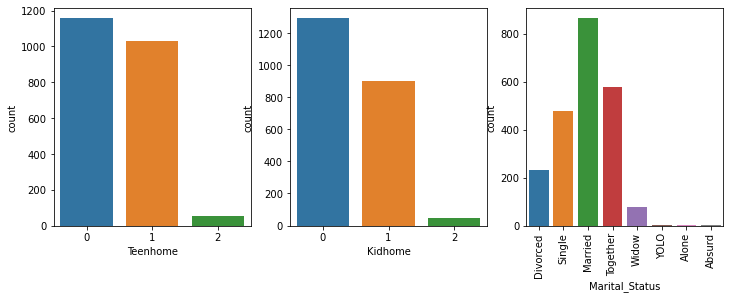

In [116]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.countplot(df['Teenhome'])

plt.subplot(1,3,2)
sns.countplot(df['Kidhome'])

plt.subplot(1,3,3)
sns.countplot(df['Marital_Status'])
plt.xticks(rotation=90)
plt.show()

### Customer education

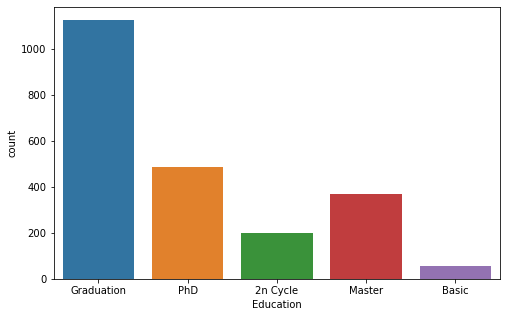

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(df["Education"])
plt.show()

### Number of customer from each country

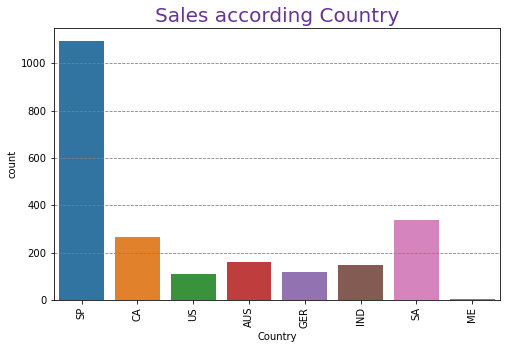

In [121]:
plt.figure(figsize=(8,5))
ax=sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.grid(color='gray', linestyle='dashed',axis = 'y')
plt.title("Sales according Country",size=20,color='rebeccapurple')
plt.show()


## Lets look at products

In [31]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,189,218,1,4,4,6,1,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,37,1,7,3,7,5,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,30,1,3,2,5,2,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,1,1,0,2,7,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,34,2,3,1,2,7,1,0,SP


In [32]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Country'],
      dtype='object')

### Plot the different product 

* finding the purchasing pattern of different proucts
  
  
   * Wines
   * Fruits
   * Meat Products
   * Fish Products
   * Sweet Products
   * Gold Products

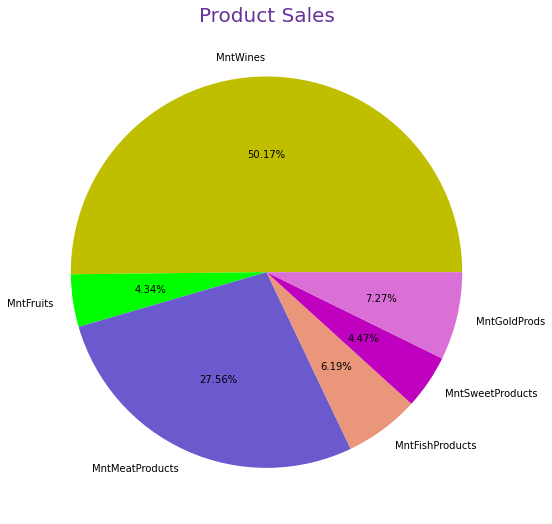

In [120]:
product_list = []
Wine_products = df['MntWines'].sum()
Fruit_products =df['MntFruits'].sum()
Meat_products = df['MntMeatProducts'].sum()
Fish_products = df['MntFishProducts'].sum()
sweet_products = df['MntSweetProducts'].sum()
gold_products = df['MntGoldProds'].sum()


plt.figure(figsize=((14,9)))
colors=['y','lime','slateblue','darksalmon','m','orchid']
products=['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
plt.pie([680816,58917,373968,84057,60621,98609],autopct="%0.2f%%",colors=colors,labels=products)
plt.title("Product Sales",size=20,color='rebeccapurple')
plt.show()

### Product purchase done by different mode

* NumWebPurchases
* NumCatalogPurchases
* NumStorePurchases

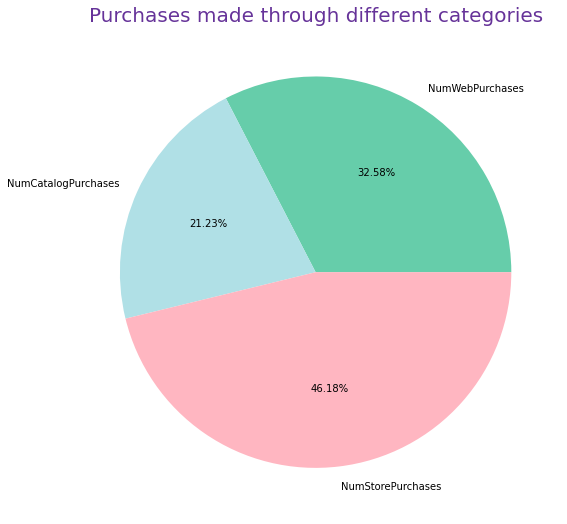

In [118]:
plt.figure(figsize=((10,9)))
colors=['mediumaquamarine','powderblue','lightpink']
mode_of_purchasing=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.pie([9150,5963,12970],autopct="%0.2f%%",colors=colors,labels=mode_of_purchasing)
plt.title("Purchases made through different categories",size=20,color='rebeccapurple')
plt.show()

### Figure out product sales in different countries

Text(0.5, 1.0, 'Gold Products')

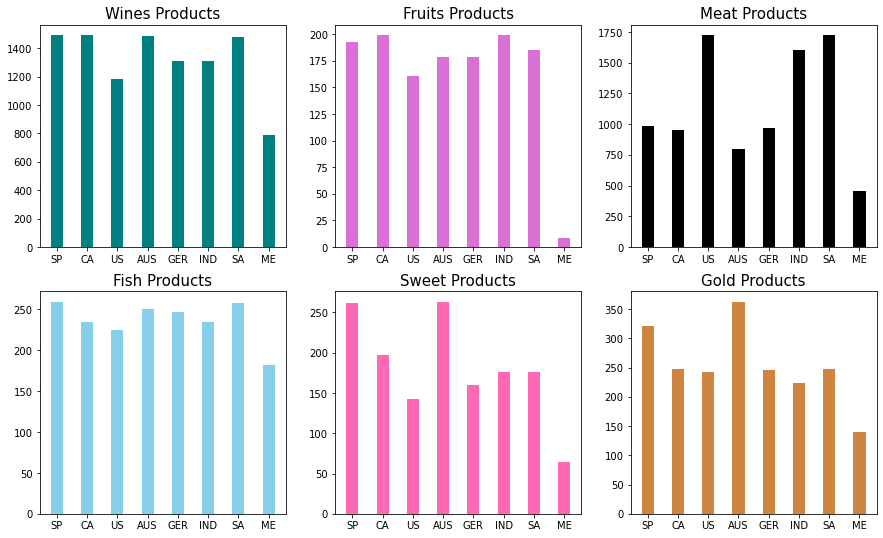

In [70]:
plt.figure(figsize=(15,9))
plt.subplot(2,3,1)
plt.bar(df['Country'],df['MntWines'], color ='teal',width = 0.4)
plt.title("Wines Products",size=15)
plt.subplot(2,3,2)
plt.bar(df['Country'],df['MntFruits'], color ='orchid',width = 0.4)
plt.title("Fruits Products",size=15)
plt.subplot(2,3,3)
plt.bar(df['Country'],df['MntMeatProducts'], color ='k',width = 0.4)
plt.title("Meat Products",size=15)
plt.subplot(2,3,4)
plt.bar(df['Country'],df['MntFishProducts'], color ='skyblue',width = 0.4)
plt.title("Fish Products",size=15)
plt.subplot(2,3,5)
plt.bar(df['Country'],df['MntSweetProducts'], color ='hotpink',width = 0.4)
plt.title("Sweet Products",size=15)
plt.subplot(2,3,6)
plt.bar(df['Country'],df['MntGoldProds'], color ='peru',width = 0.4)
plt.title("Gold Products",size=15)

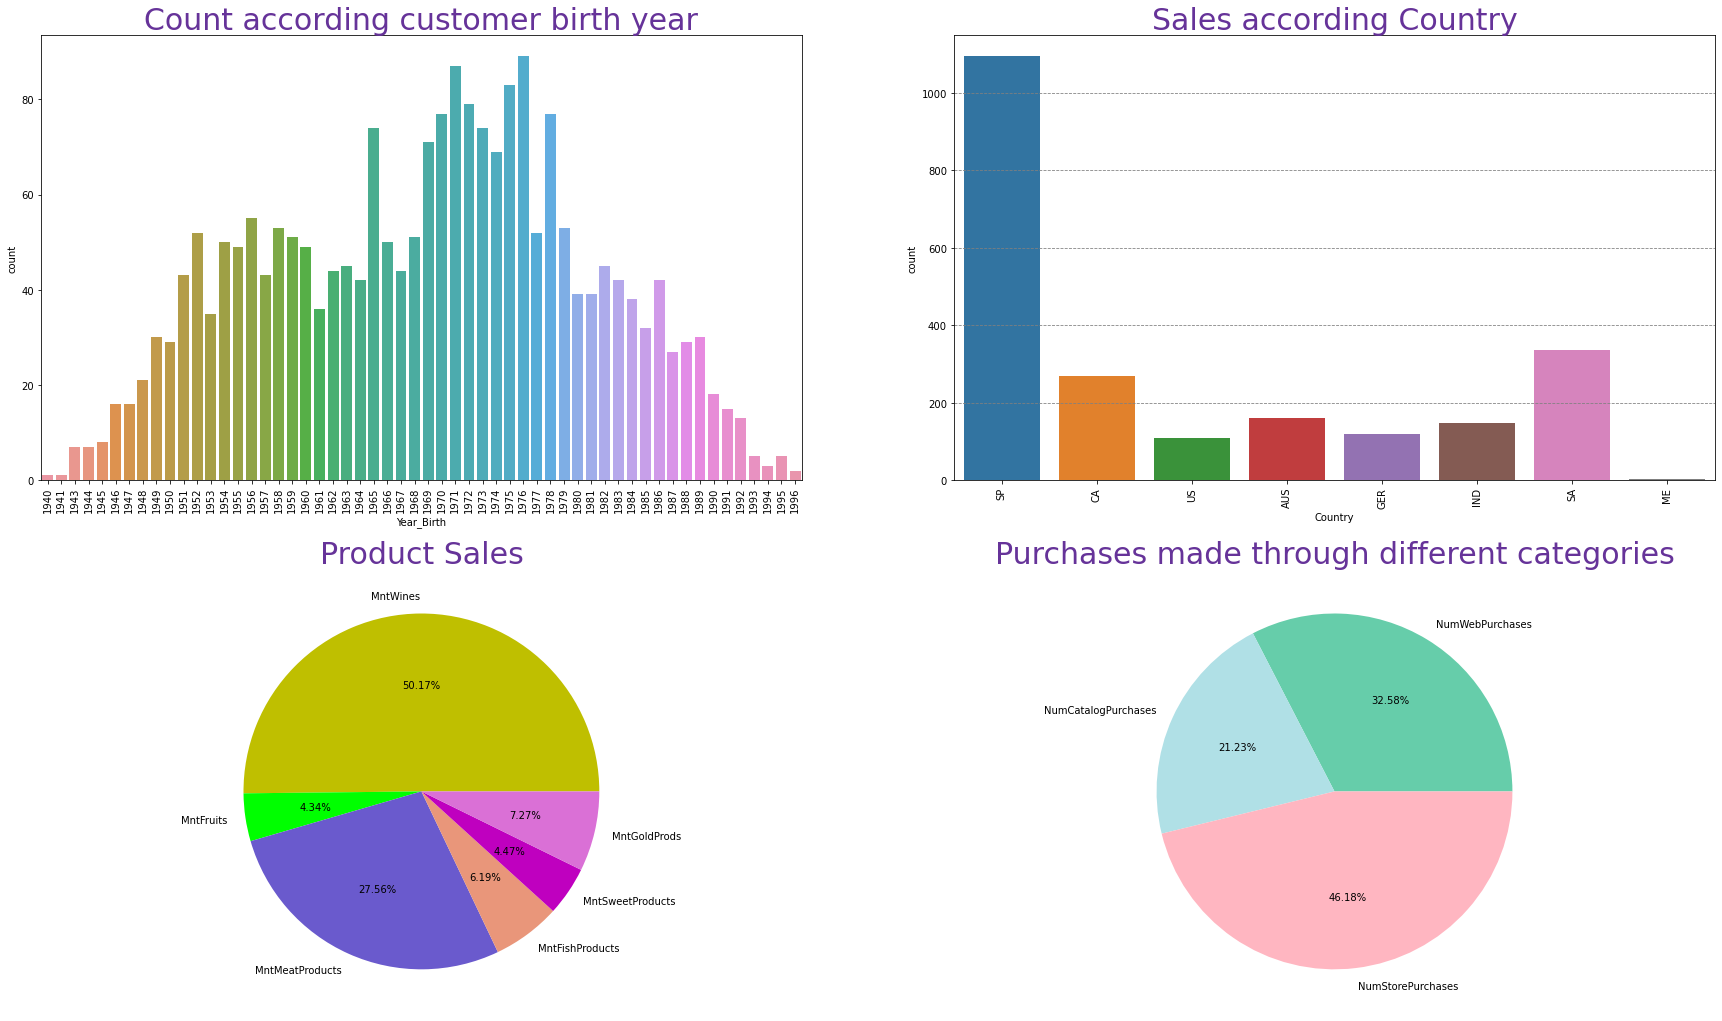

In [108]:
plt.figure(figsize=(30,18))
plt.subplot(2,2,1)
ax=sns.countplot(df['Year_Birth'])
plt.xticks(rotation=90)
plt.title("Count according customer birth year",size=30,color='rebeccapurple')

plt.subplot(2,2,2)
ax=sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.grid(color='gray', linestyle='dashed',axis = 'y')
plt.title("Sales according Country",size=30,color='rebeccapurple')


plt.subplot(2,2,3)
colors=['y','lime','slateblue','darksalmon','m','orchid']
products=['MntWines','MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
plt.pie([680816,58917,373968,84057,60621,98609],autopct="%0.2f%%",colors=colors,labels=products)
plt.title("Product Sales",size=30,color='rebeccapurple')

plt.subplot(2,2,4)
colors=['mediumaquamarine','powderblue','lightpink']
mode_of_purchasing=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']
plt.pie([9150,5963,12970],autopct="%0.2f%%",colors=colors,labels=mode_of_purchasing)
plt.title("Purchases made through different categories",size=30,color='rebeccapurple')

plt.show()

## Conclusion

* You have to find the customer purchasing trend and pattern from the previous customer purchasing dataset and suggest how to improve sales.

    * Finding 1
        * __Most of customer are born between 1950 and 1990__
            * Need to attarct young customer born after 1990 
            
    * Finding 2 
        * __company sale are high in spain__ 
            * Improve marketing in other countries 
            
    * Finding 3
        * __Meat and wine are most selling product__
        * __Fruits and sweets are least selling product__
            * _Marketing other product to increas overall sales